<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & Classification

### Contents:
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Modeling](#Data-Modeling)
- [Model Interpretation](#-Model-Interpretation)
- [Summary of Analysis](#Summary-of-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In [2]:
#read csv that write from p3_data_gathering.ipynb
surface = pd.read_csv('../data/surface.csv')
ipad = pd.read_csv('../data/ipad.csv')

In [3]:
surface.head() 

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,post_hint,url_overridden_by_dest,preview,link_flair_template_id,media_metadata,author_cakeday,crosspost_parent_list,crosspost_parent,is_gallery,gallery_data
0,NaN,Surface,# Purchase Advice Thread\n\nPeople are always ...,t2_6l4z3,False,NaN,0,False,Purchase Advice Thread (March 15),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Surface,NaN,t2_auf2y,False,NaN,0,False,Phil Spencer playing Xbox games on an unreleas...,"[{'e': 'text', 't': '[X]'}]",...,image,https://i.redd.it/yoaiis71hfn61.jpg,{'images': [{'source': {'url': 'https://previe...,473c5b12-e55c-11e9-be66-0e304224a4c2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Surface,NaN,t2_7cj7az9l,False,NaN,0,False,Appreciation post - Home office and entertainm...,"[{'e': 'text', 't': '[BOOK3]'}]",...,image,https://i.redd.it/lslxppkf5kn61.jpg,{'images': [{'source': {'url': 'https://previe...,8d70c71a-8f9a-11ea-bb84-0ebaa43cfe07,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Surface,NaN,t2_13g8o7,False,NaN,0,False,Took advantage of the discount to upgrade from...,"[{'e': 'text', 't': '[GO2]'}]",...,image,https://i.redd.it/xrs6zigifhn61.jpg,{'images': [{'source': {'url': 'https://previe...,9f07dda6-8f9a-11ea-81a6-0e2fa157f681,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Surface,my Surface Pro 2017 (a fanless i5 one) was get...,t2_dfmwt,False,NaN,0,False,TIL: Surface Dock software can be updated and ...,"[{'e': 'text', 't': '[DOCK]'}]",...,self,NaN,{'images': [{'source': {'url': 'https://extern...,358d94f8-935a-11e8-aab2-0e47f48571c4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
surface['name'] #identify post name - use to clean duplicated post

0       t3_m5fpjr
1       t3_m6ev97
2       t3_m6wm9s
3       t3_m6njjf
4       t3_m6zyn3
          ...    
1236    t3_m0nf5l
1237    t3_m0s1ze
1238    t3_m0kwky
1239    t3_m0ws1h
1240    t3_m0bm03
Name: name, Length: 1241, dtype: object

In [5]:
surface.shape

(1241, 115)

In [6]:
ipad.shape

(1240, 111)

In [7]:
#check for duplicated
surface.duplicated(['name']).sum()

251

In [8]:
#drop duplicated rows
surface.drop_duplicates(['name'],inplace=True)
surface.shape

(990, 115)

In [9]:
#doing the same for ipad
ipad.drop_duplicates(['name'],inplace=True)
ipad.shape

(569, 111)

In [10]:
#Check for interesting columns to do EDA
[c for c in surface.columns]

['approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'collections',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'author_flair_type',
 'domain',
 'all

In [11]:
surface['created'][:5] #Check for Created time of the post

0    1.615824e+09
1    1.615946e+09
2    1.616003e+09
3    1.615969e+09
4    1.616015e+09
Name: created, dtype: float64

In [12]:
from datetime import datetime, timedelta
from time import time,ctime

#apply ctime to created column
surface_create_time = surface['created'].apply(lambda x : ctime(x))
surface_df_time = pd.to_datetime(surface_create_time)
surface_df_time = surface_df_time - timedelta(hours=7) #check with timezone GMT+7
surface['created_gmt7'] = surface_df_time


ipad_cr_time = ipad['created'].apply(lambda x : ctime(x))
ipad_df_time = pd.to_datetime(ipad_cr_time)
ipad_df_time = ipad_df_time - timedelta(hours=7) #check with timezone GMT+7
ipad['created_gmt7'] = ipad_df_time

In [13]:
#filter out columns
col = ['subreddit','selftext','title','num_comments','created_gmt7']
surface = surface[col]
ipad = ipad[col]

In [14]:
surface['selftext'].isnull().sum() #check for null

150

In [15]:
#fill null selftex with "" to be able to add with title
surface['selftext'].fillna('',inplace=True)

In [16]:
surface['text'] = surface['title'] + " "+ surface['selftext']
ipad['selftext'].fillna('',inplace=True)
ipad['text'] = ipad['title'] + " "+ ipad['selftext']

In [17]:
data = pd.concat([surface,ipad],axis=0).reset_index(drop=True)
data

,subreddit,selftext,title,num_comments,created_gmt7,text
0,Surface,# Purchase Advice Thread\n\nPeople are always ...,Purchase Advice Thread (March 15),16,2021-03-15 16:00:15,Purchase Advice Thread (March 15) # Purchase A...
1,Surface,,Phil Spencer playing Xbox games on an unreleas...,85,2021-03-17 01:48:10,Phil Spencer playing Xbox games on an unreleas...
2,Surface,,Appreciation post - Home office and entertainm...,2,2021-03-17 17:35:49,Appreciation post - Home office and entertainm...
3,Surface,,Took advantage of the discount to upgrade from...,11,2021-03-17 08:23:17,Took advantage of the discount to upgrade from...
4,Surface,my Surface Pro 2017 (a fanless i5 one) was get...,TIL: Surface Dock software can be updated and ...,0,2021-03-17 21:06:15,TIL: Surface Dock software can be updated and ...
...,...,...,...,...,...,...
1554,ipad,,A simple iPad Pro station,122,2021-02-05 03:41:38,A simple iPad Pro station
1555,ipad,Guys - wondering your thoughts on this. I'm s...,iPad Air 4 - Text Blur While Scrolling,5,2021-02-06 08:16:50,iPad Air 4 - Text Blur While Scrolling Guys - ...
1556,ipad,Good Morning:\n\nI am looking for a wireless c...,iPad Air (4th Gen) wireless charging stand,2,2021-02-06 02:24:17,iPad Air (4th Gen) wireless charging stand Goo...
1557,ipad,Hi there. I'm an artist who deals with a lot o...,Moving images from photos app to files,6,2021-02-05 23:51:04,Moving images from photos app to files Hi ther...


In [18]:
data.subreddit.value_counts()

Surface    990
ipad       569
Name: subreddit, dtype: int64

# Exploratory Data Analysis

In [19]:
data.created_gmt7 = data.created_gmt7.dt.round('H') #round out minute and second
data['created_day'] = data.created_gmt7.dt.round('D').astype('str') #use for plotting
data['created_hour'] = data.created_gmt7.dt.hour
data['days_of_week'] = data.created_gmt7.dt.dayofweek.map({
    0:'Monday',1:'Tuesday',2:'Wednesday',3:"Thursday",4:"Friday",5:'Saturday',6:'Sunday'
})
data.head()

,subreddit,selftext,title,num_comments,created_gmt7,text,created_day,created_hour,days_of_week
0,Surface,# Purchase Advice Thread\n\nPeople are always ...,Purchase Advice Thread (March 15),16,2021-03-15 16:00:00,Purchase Advice Thread (March 15) # Purchase A...,2021-03-16,16,Monday
1,Surface,,Phil Spencer playing Xbox games on an unreleas...,85,2021-03-17 02:00:00,Phil Spencer playing Xbox games on an unreleas...,2021-03-17,2,Wednesday
2,Surface,,Appreciation post - Home office and entertainm...,2,2021-03-17 18:00:00,Appreciation post - Home office and entertainm...,2021-03-18,18,Wednesday
3,Surface,,Took advantage of the discount to upgrade from...,11,2021-03-17 08:00:00,Took advantage of the discount to upgrade from...,2021-03-17,8,Wednesday
4,Surface,my Surface Pro 2017 (a fanless i5 one) was get...,TIL: Surface Dock software can be updated and ...,0,2021-03-17 21:00:00,TIL: Surface Dock software can be updated and ...,2021-03-18,21,Wednesday


In [20]:
plt.style.use('ggplot') #set style

Text(0, 0.5, 'Number of posts')

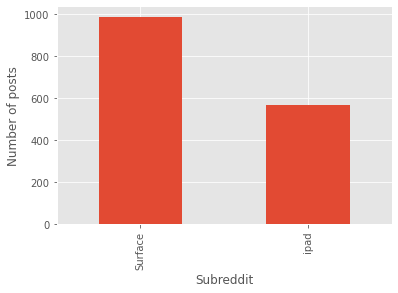

In [21]:
data.subreddit.value_counts().plot(kind='bar')
plt.xlabel('Subreddit')
plt.ylabel('Number of posts')

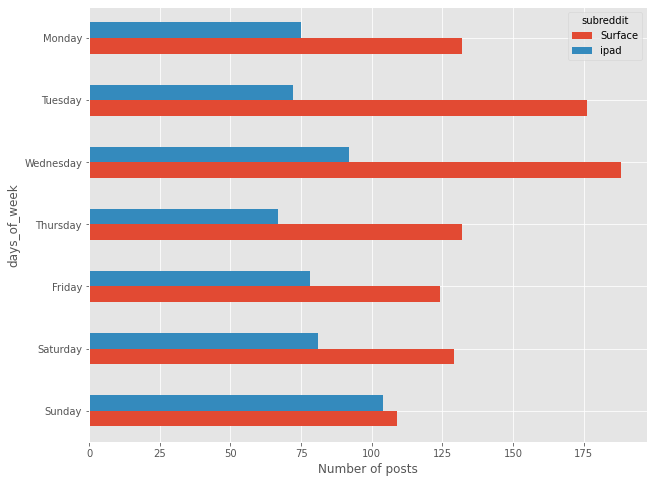

In [22]:
#plot number of posts per day of week
data.groupby('days_of_week')['subreddit'].value_counts().unstack().reindex(['Sunday','Saturday','Friday','Thursday',
                                                                           'Wednesday','Tuesday','Monday']).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of posts');


For surface subreddit, in the past month, there tends to be post in Tuesday and Wednesday while for iPad there is not much difference in day of posting.

Text(0.5, 1.0, 'Number of posts per day (iPad)')

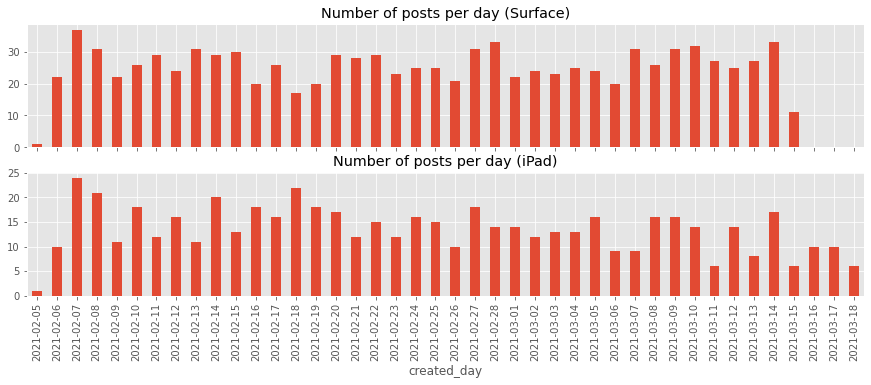

In [23]:
#plot Number of posts per day
plt.figure(figsize=(15,5))

plt.subplot(2,1,1)
ax1= data[data['subreddit'] == 'Surface'].groupby('created_day')['text'].count().plot(kind = 'bar')
plt.title('Number of posts per day (Surface)')
plt.subplot(2,1,2,sharex=ax1)
ax2= data[data['subreddit'] == 'ipad'].groupby('created_day')['text'].count().plot(kind = 'bar');
plt.title('Number of posts per day (iPad)')

Text(0.5, 1.0, 'Number of posts per hour (iPad)')

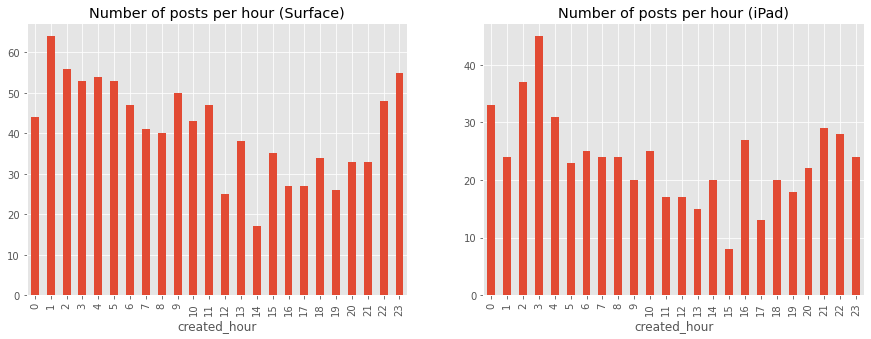

In [24]:
#plot Number of posts per hour
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
data[data['subreddit'] == 'Surface'].groupby('created_hour')['text'].count().plot(kind = 'bar')
plt.title('Number of posts per hour (Surface)')

plt.subplot(1,2,2)
data[data['subreddit'] == 'ipad'].groupby('created_hour')['text'].count().plot(kind = 'bar');
plt.title('Number of posts per hour (iPad)')

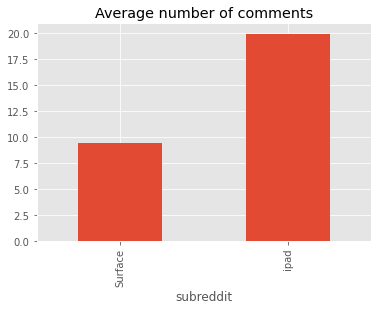

In [25]:
#plot avearage number of comments per post
data.groupby('subreddit')['num_comments'].mean().plot(kind='bar')
plt.title('Average number of comments');

# Data Modeling

convert subreddit into binary:
- surface = 0
- ipad = 1

In [26]:
data['subreddit']= data.subreddit.map({"Surface":0,"ipad":1})
data

,subreddit,selftext,title,num_comments,created_gmt7,text,created_day,created_hour,days_of_week
0,0,# Purchase Advice Thread\n\nPeople are always ...,Purchase Advice Thread (March 15),16,2021-03-15 16:00:00,Purchase Advice Thread (March 15) # Purchase A...,2021-03-16,16,Monday
1,0,,Phil Spencer playing Xbox games on an unreleas...,85,2021-03-17 02:00:00,Phil Spencer playing Xbox games on an unreleas...,2021-03-17,2,Wednesday
2,0,,Appreciation post - Home office and entertainm...,2,2021-03-17 18:00:00,Appreciation post - Home office and entertainm...,2021-03-18,18,Wednesday
3,0,,Took advantage of the discount to upgrade from...,11,2021-03-17 08:00:00,Took advantage of the discount to upgrade from...,2021-03-17,8,Wednesday
4,0,my Surface Pro 2017 (a fanless i5 one) was get...,TIL: Surface Dock software can be updated and ...,0,2021-03-17 21:00:00,TIL: Surface Dock software can be updated and ...,2021-03-18,21,Wednesday
...,...,...,...,...,...,...,...,...,...
1554,1,,A simple iPad Pro station,122,2021-02-05 04:00:00,A simple iPad Pro station,2021-02-05,4,Friday
1555,1,Guys - wondering your thoughts on this. I'm s...,iPad Air 4 - Text Blur While Scrolling,5,2021-02-06 08:00:00,iPad Air 4 - Text Blur While Scrolling Guys - ...,2021-02-06,8,Saturday
1556,1,Good Morning:\n\nI am looking for a wireless c...,iPad Air (4th Gen) wireless charging stand,2,2021-02-06 02:00:00,iPad Air (4th Gen) wireless charging stand Goo...,2021-02-06,2,Saturday
1557,1,Hi there. I'm an artist who deals with a lot o...,Moving images from photos app to files,6,2021-02-06 00:00:00,Moving images from photos app to files Hi ther...,2021-02-06,0,Saturday


### Clean text before putting into model

In [27]:
# Import stopwords.
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#create list of stopwords
stopword_list = stopwords.words("english")
add_stopwords = ['surface','surfaces','ipad','ipads']
stopword_list.extend(add_stopwords)
stopword_list = sorted(list(set(stopword_list)))
stopword_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'ipad',
 'ipads',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 

In [29]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re
def robust_text(text,stopword_list):
    """ Receive text as type string and 
    - remove none letter
    - convert all text to lowercase,
    - remove punctuation,
    - stem or lemmatize each word of the text,
    - remove stopwords.
    """
    text_letter = re.sub("[^A-Za-z]"," ",text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text_letter.lower())
    tokens_no_stop = [w for w in tokens if w not in stopword_list ]
    p_stemmer = PorterStemmer()
    stem_word = []
    for w in tokens_no_stop:
        stem_word.append(p_stemmer.stem(w))
    result = " "
    return result.join(stem_word)

In [30]:
#clean text
data['text'] = [robust_text(t,stopword_list) for t in data['text']]
data

,subreddit,selftext,title,num_comments,created_gmt7,text,created_day,created_hour,days_of_week
0,0,# Purchase Advice Thread\n\nPeople are always ...,Purchase Advice Thread (March 15),16,2021-03-15 16:00:00,purchas advic thread march purchas advic threa...,2021-03-16,16,Monday
1,0,,Phil Spencer playing Xbox games on an unreleas...,85,2021-03-17 02:00:00,phil spencer play xbox game unreleas xcloud ap...,2021-03-17,2,Wednesday
2,0,,Appreciation post - Home office and entertainm...,2,2021-03-17 18:00:00,appreci post home offic entertain corner touch,2021-03-18,18,Wednesday
3,0,,Took advantage of the discount to upgrade from...,11,2021-03-17 08:00:00,took advantag discount upgrad die go,2021-03-17,8,Wednesday
4,0,my Surface Pro 2017 (a fanless i5 one) was get...,TIL: Surface Dock software can be updated and ...,0,2021-03-17 21:00:00,til dock softwar updat may help overh issu pro...,2021-03-18,21,Wednesday
...,...,...,...,...,...,...,...,...,...
1554,1,,A simple iPad Pro station,122,2021-02-05 04:00:00,simpl pro station,2021-02-05,4,Friday
1555,1,Guys - wondering your thoughts on this. I'm s...,iPad Air 4 - Text Blur While Scrolling,5,2021-02-06 08:00:00,air text blur scroll guy wonder thought strugg...,2021-02-06,8,Saturday
1556,1,Good Morning:\n\nI am looking for a wireless c...,iPad Air (4th Gen) wireless charging stand,2,2021-02-06 02:00:00,air th gen wireless charg stand good morn look...,2021-02-06,2,Saturday
1557,1,Hi there. I'm an artist who deals with a lot o...,Moving images from photos app to files,6,2021-02-06 00:00:00,move imag photo app file hi artist deal lot re...,2021-02-06,0,Saturday


In [31]:
X = data['text']
y = data['subreddit']

### Creating Wordcloud

In [32]:
#pip install wordcloud

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
surface_text = " ".join(data[data['subreddit'] == 0]['text'])
ipad_text = " ".join(data[data['subreddit'] == 1]['text'])

In [35]:
stopwords_wordcloud = set(STOPWORDS)

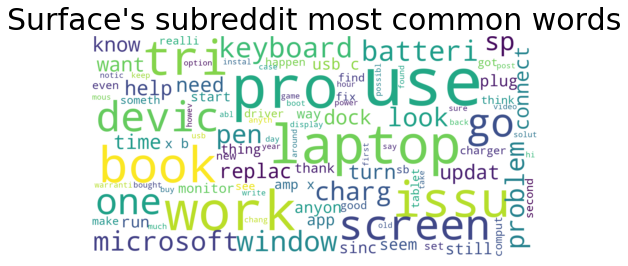

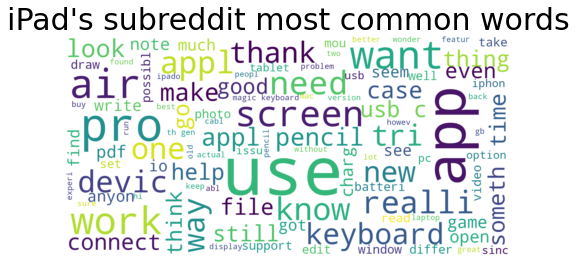

In [36]:
# Create and generate a word cloud image:
wordcloud_sf = WordCloud(scale=4,max_font_size=60, max_words=100, background_color="white",
                     stopwords=stopwords_wordcloud).generate(surface_text)

# Display the generated image:
plt.figure(figsize=(8,6))
plt.title("Surface's subreddit most common words",fontsize=30)
plt.imshow(wordcloud_sf, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create and generate a word cloud image:
wordcloud_ip = WordCloud(scale=4,max_font_size=60, max_words=100, background_color="white",
                     stopwords=stopwords_wordcloud).generate(ipad_text)

# Display the generated image:
plt.figure(figsize=(8,6))
plt.title("iPad's subreddit most common words",fontsize=30)
plt.imshow(wordcloud_ip, interpolation='bilinear')
plt.axis("off")
plt.show()


For surface, they seems to have common words of laptop / book that indicate surface book (one of its line-up) while iPad contain pro,air,appl,pencil indicating its model and accessories

### Create model

In [37]:
#Import model libraries
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


In [38]:
def return_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    return model.score(X_train,y_train),cross_val_score(model,X_train,y_train).mean(),model.score(X_test,y_test)

In [39]:
def table_score(X,y,transformer,model_list = ''):
    """return a dataframe with that has r2 score of train,validation,test data using the following estimator,defualt parameter:
    
    -LogisticRegression
    -KNeighborsClassifier
    -MultinomialNB
    -BernoulliNB
    -DecisionTreeClassifier
    -BaggingClassifier
    -RandomForestClassifier
    -ExtraTreesClassifier
    -AdaBoostClassifier
    -GradientBoostingClassifier
    
    by input transformer such as Countvectorizer/TfidFvectorizer
    """
    #obtain transformer name
    name = str(transformer)
    name = name[:name.index('(')]
    #Doing Train-test-split
    X_train,X_test,y_train,y_test = train_test_split(X,y,stratify =y,random_state=42)
    #Transform data / Vectorizer
    tf = transformer
    tf.fit(X_train)
    X_train_tf = tf.transform(X_train)
    X_test_tf = tf.transform(X_test)
    
    #create blanklist
    row = []
    
    #create model list
    if model_list == '':
        model_list = [LogisticRegression(),
                KNeighborsClassifier(),
                MultinomialNB(),
                BernoulliNB(),
                DecisionTreeClassifier(),
                BaggingClassifier(),
                RandomForestClassifier(),
                ExtraTreesClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier()]
    
    #Fit and score using return_score function
    for model in model_list:
        score = return_score(model,X_train_tf,y_train,X_test_tf,y_test)
        name_model = str(model)
        name_model = name_model[:name_model.index('(')]
        row.append([name,name_model,score[0],score[1],score[2]])
    
    
    df = pd.DataFrame(row,columns=['transformer','estimator','r2_training','r2_validating','r2_testing'])
    
    return df

### Using Countvectorizer & TfidfVectorizer (default parameter)

In [40]:
#using function table_score and concat dataframe
cvec_df = table_score(X,y,CountVectorizer(stop_words='english'))
tvec_df = table_score(X,y,TfidfVectorizer(stop_words='english'))

In [41]:
pd.concat([cvec_df,tvec_df],axis=0).sort_values('r2_testing',ascending=False).head()

,transformer,estimator,r2_training,r2_validating,r2_testing
0,CountVectorizer,LogisticRegression,0.998289,0.875082,0.851282
2,CountVectorizer,MultinomialNB,0.947819,0.857988,0.851282
0,TfidfVectorizer,LogisticRegression,0.945252,0.843447,0.846154
9,CountVectorizer,GradientBoostingClassifier,0.905902,0.857115,0.835897
6,CountVectorizer,RandomForestClassifier,1.000000,0.850295,0.830769


### Using Countvectorizer & TfidfVectorizer (ngram (1,2))

In [ ]:
#using function table_score and concat dataframe
cvec_df = table_score(X,y,CountVectorizer(stop_words='english',ngram_range=(1,2)))
tvec_df = table_score(X,y,TfidfVectorizer(stop_words='english',ngram_range=(1,2)))

In [ ]:
pd.concat([cvec_df,tvec_df],axis=0).sort_values('r2_testing',ascending=False).head()

### Adding more common stopword

In [ ]:
add_stopwords = ['devic','screen','keyboard','use','want','work','need']
stopword_list.extend(add_stopwords)
stopword_list = sorted(list(set(stopword_list)))
data['text_2'] = [robust_text(t,stopword_list) for t in data['text']]
surface_text_2 = " ".join(data[data['subreddit'] == 0]['text_2'])
ipad_text_2 = " ".join(data[data['subreddit'] == 1]['text_2'])

In [ ]:
# Create and generate a word cloud image:
wordcloud_sf_2 = WordCloud(scale=4,max_font_size=60, max_words=100, background_color="white",
                     stopwords=stopwords_wordcloud).generate(surface_text_2)

# Display the generated image:
plt.figure(figsize=(8,6))
plt.title("Surface's subreddit most common words",fontsize=30)
plt.imshow(wordcloud_sf_2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create and generate a word cloud image:
wordcloud_ip_2 = WordCloud(scale=4,max_font_size=60, max_words=100, background_color="white",
                     stopwords=stopwords_wordcloud).generate(ipad_text_2)

# Display the generated image:
plt.figure(figsize=(8,6))
plt.title("iPad's subreddit most common words",fontsize=30)
plt.imshow(wordcloud_ip_2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Build model when remove more words using ngram (1,2)

In [ ]:
X_2 = data['text_2']
y_2 = data['subreddit']
model_list_2 = [LogisticRegression(),MultinomialNB()]

In [ ]:
cvec_df_2 = table_score(X_2,y_2,CountVectorizer(stop_words='english',ngram_range=(1,2)),model_list_2)
tvec_df_2 = table_score(X_2,y_2,TfidfVectorizer(stop_words='english',ngram_range=(1,2)),model_list_2)

In [ ]:
pd.concat([cvec_df_2,tvec_df_2],axis=0).sort_values('r2_testing',ascending = False)

Without remove common words obtain better score.

### Select 'CountVectorizer' & 'LogisticRegression' and tune Hyperparameter

Using ngram_range = (1,2) and try to reduce overfit by logreg

In [ ]:
# Doing Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify =y,random_state=42)

In [ ]:
pipe = Pipeline([('cvec',CountVectorizer(stop_words='english',ngram_range=(1,2))),
                ('logreg',LogisticRegression())])
pipe.get_params() #Check for hyperparameter

In [ ]:
#set hyperparameter to tune for
pipe_params = {'cvec__max_df':[ 1.0,0.9,0.8],
               'cvec__max_features': [None,5000,10000,15000,20000],
               'cvec__min_df': [1,2],
               'logreg__C': [1.0,0.5,0.1]
               }
#Instantiate GridsearchCV
gs = GridSearchCV(pipe,param_grid=pipe_params,cv=5)


In [ ]:
gs.fit(X_train,y_train) #fit model

In [ ]:
gs.best_score_ #check for best validating score

In [ ]:
gs.best_params_ #check for best param

In [ ]:
pipe_2 = Pipeline([('cvec',CountVectorizer(stop_words='english',ngram_range=(1,2))),
                ('logreg',LogisticRegression(C=0.5))])
pipe_params_2 = {'cvec__max_features': [3000,4000,5000,6000,7000]}
#Instantiate GridsearchCV
gs_2 = GridSearchCV(pipe_2,param_grid=pipe_params_2,cv=5)
gs_2.fit(X_train,y_train)

In [ ]:
gs_2.best_score_

In [ ]:
gs_2.best_params_

In [ ]:
#Check for default max_feature if ngram_range = (1,1)
cvec = CountVectorizer(ngram_range=(1, 1),stop_words='english')
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
cvec_df = pd.DataFrame(X_train_cvec.toarray(),columns = cvec.get_feature_names())
cvec_df.shape

In [ ]:
cvec_df

In [ ]:
#Check for default max_feature if ngram_range = (1,2)
cvec = CountVectorizer(ngram_range=(1, 2),stop_words='english')
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
cvec_df = pd.DataFrame(X_train_cvec.toarray(),columns = cvec.get_feature_names())
cvec_df.shape

In [ ]:
cvec_df

Max feature is **40028** words while Gridsearch indicated that **5000** words showing best score. Then we build a Final Model.

# Build Final Model using hyperparameter from Gridsearch

In [ ]:
#Instantiate Transformer
cvec = CountVectorizer(ngram_range=(1, 2),max_features=5000,stop_words='english')
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [ ]:
logreg = LogisticRegression(C=0.5)
logreg.fit(X_train_cvec,y_train)
logreg.score(X_train_cvec,y_train)

In [ ]:
cross_val_score(logreg,X_train_cvec,y_train).mean()

In [ ]:
logreg.score(X_test_cvec,y_test)

Final model is a bit less overfitted when using parameter from GridsearchCV. (From 

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test,logreg.predict(X_test_cvec))

In [ ]:
confusion_matrix

In [ ]:
plt.style.use('default')
plot_confusion_matrix(logreg,X_test_cvec,y_test);

# Model Interpretation

**Check coefficient of logistic regrssion model**

In [ ]:
np.exp(logreg.coef_[0])

In [ ]:
#compare log_proba of each class
df_coef = pd.DataFrame(columns=['feature_name','log_reg_coef'])
df_coef['feature_name'] = cvec.get_feature_names()
df_coef['log_reg_coef']= np.exp(logreg.coef_[0])


In [ ]:
df_coef

In [ ]:
df_coef.sort_values('log_reg_coef',ascending=False).head(20)

In [ ]:
df_coef.sort_values('log_reg_coef',ascending=True).head(20)

**study wrong prediction**

In [ ]:
len(logreg.predict(X_test_cvec))

In [ ]:
X_test.shape

In [ ]:
logreg.predict_proba(X_test_cvec)

In [ ]:
df_predict_proba = pd.DataFrame(columns = ['text','predict','actual','result','predict_proba_surface','predict_proba_ipad','delta_proba_surface'])
df_predict_proba

In [ ]:
df_predict_proba['text'] = X_test
df_predict_proba['predict'] = logreg.predict(X_test_cvec)
df_predict_proba['actual'] = y_test
df_predict_proba['result'] = (df_predict_proba['predict'] == df_predict_proba['actual']).astype(int).map({1:'Correct',0:'Wrong'})
df_predict_proba['predict_proba_surface'] = [prob[0] for prob in logreg.predict_proba(X_test_cvec)]
df_predict_proba['predict_proba_ipad'] =  [prob[1] for prob in logreg.predict_proba(X_test_cvec)]
df_predict_proba['delta_proba_surface'] = df_predict_proba['predict_proba_surface'] - df_predict_proba['predict_proba_ipad']

In [ ]:
df_inspect = df_predict_proba[df_predict_proba['result'] == 'Wrong'].sort_values('delta_proba_surface')
df_inspect

In [ ]:
df_inspect.sort_values('delta_proba_surface').head()

In [ ]:
print(data.loc[895]['title'])

In [ ]:
print(data.loc[895]['selftext']) #this post is in surface but predicted ipad

In [ ]:
df_coef[df_coef['feature_name']=='app'] #normally for windows user, it will be callled 'program'

In [ ]:
df_inspect.sort_values('delta_proba_surface').tail()

In [ ]:
print(data.loc[1278]['title'])

In [ ]:
print(data.loc[1278]['selftext'])

In [ ]:
df_coef[df_coef['feature_name']=='book']

# Summary of Analysis

The model used to classify posts from surface and ipad subreddit is a combination of CountVectorizer and LogisticRegression.Countvectorizer chop the text or sentence into words while logisticregression use regression model to predict whether the following sets of word come from which subreddit.

Final model has accuracy of 84% on testing datasets. When the wrong predictions are studied, it was found that if the post contains a strong correlate word to each brand such as 'window' (surface-leaning side) or 'app' (ipad-leaning side), the model is likely to predict incorrectly,whichcan be improved by adding stopword/words used to remove from texts used for training model.

When looking at feature importance or how the words impact the prediction of the model,the model showed that the words like
- apple,ios,magic,pencil,safari

show a strong correlation for ipad topics because this set of words is apple's renowned product. This indicates that apple has a strong marketing campaign and product characteristics.

While, for surface subreddit, top keywords for model predicting this class are

- book,sp (surface pro),pen,microsoft,sb (surface book)

which are also a identity of microsoft surface line up. But also negative words have came up such as

- fix,replace

This indicated that microsoft surface still has some flaws. If the company has the ability to reduce the number of warranty claims or repairing claims. It should be able to increase products' brand , revenue and marketshare. Also apart from the model line-up, if microsoft can launch accessories or any aesthetic items, it should be able to attract new customers from apple side as well

# Conclusions and Recommendations

Based on our problem statement, we found that
1. Keywords that make model predict ipad are Apple's product which is well known such as ios,magic keyboard or apple pencil and the model didn't show much of negative words in those keyword.
2. While surfaces' keyword also showed the same trend except that there are negative words like 'fix' or 'replace'

To make a surface product better, it is recommended that
1. Microsoft should consider improving product endurance to reduce number of warranty claim.
2. Microsoft should consider launching aesthetic products/items for surface line-ups